# Prescriptor robojudge
Notebook for evaluating prescriptions using standard predictor.

The main metric computed is based on how many other prescriptions
each submission dominates on the pareto front of stringency vs cases.

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from covid_xprize.standard_predictor.xprize_predictor import NPI_COLUMNS
from covid_xprize.scoring.prescriptor_scoring import weight_prescriptions_by_cost
from covid_xprize.scoring.prescriptor_scoring import generate_cases_and_stringency_for_prescriptions
from covid_xprize.scoring.prescriptor_scoring import compute_domination_df
from covid_xprize.scoring.prescriptor_scoring import compute_pareto_set
from covid_xprize.validation.prescriptor_validation import validate_submission

In [4]:
# Can set these longer for better evaluation. Will increase eval time
START_DATE = "2020-08-01"
END_DATE = "2020-08-05"

# Prepare Historical IP Data

In [5]:
from covid_xprize.scoring.predictor_scoring import load_dataset
from covid_xprize.validation.scenario_generator import generate_scenario

LATEST_DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker-legacy/main/legacy_data_202207/OxCGRT_latest.csv'
GEO_FILE = "countries_regions.csv"

latest_df = load_dataset(LATEST_DATA_URL, GEO_FILE)

In [6]:
IP_FILE = "robojudge_test_scenario.csv"
countries = None
scenario_df = generate_scenario(START_DATE, END_DATE, latest_df, countries, scenario="Freeze")
scenario_df.to_csv(IP_FILE, index=False)

# Generate some prescriptions

In [7]:
# Cost weightings for each IP for each geo
TEST_COST = "covid_xprize/validation/data/uniform_random_costs.csv"

In [8]:
# Generate some random prescriptions
for i in range(2):
    output_file = "covid_xprize/examples/prescriptors/random/prescriptions/random_presc_"+ str(i+1) +".csv"
    !python covid_xprize/examples/prescriptors/random/prescribe.py -s {START_DATE} \
                                                                   -e {END_DATE} \
                                                                   -ip {IP_FILE} \
                                                                   -c {TEST_COST} \
                                                                   -o {output_file}

Generating prescriptions from 2020-08-01 to 2020-08-05...
Done!
Generating prescriptions from 2020-08-01 to 2020-08-05...
Done!


In [9]:
# Generate blind_greedy prescriptions
output_file = "covid_xprize/examples/prescriptors/blind_greedy/prescriptions/blind_greedy.csv"
!python covid_xprize/examples/prescriptors/blind_greedy/prescribe.py -s {START_DATE} \
                                                                     -e {END_DATE} \
                                                                     -ip {IP_FILE} \
                                                                     -c {TEST_COST} \
                                                                     -o {output_file}

Generating prescriptions from 2020-08-01 to 2020-08-05...
Done!


In [34]:
prescription_files = {
    'NeatExample': 'covid_xprize/examples/prescriptors/neat/prescriptions/test_prescriptions.csv',
    # 'Random1': 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_1.csv',
    # 'Random2': 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_2.csv',
    'BlindGreedy': 'covid_xprize/examples/prescriptors/blind_greedy/prescriptions/blind_greedy.csv',
}

In [35]:
# Validate the prescription files
for prescriptor_name, output_file in prescription_files.items():
    errors = validate_submission(START_DATE, END_DATE, IP_FILE, output_file)
    if errors:
        for error in errors:
            print(f"{prescriptor_name}: {error}")
    else:
        print(f"{prescriptor_name}: All good!")

NeatExample: All good!
BlindGreedy: All good!


# Evaluate them

In [37]:
# Collect case and stringency data for all prescriptors
dfs = []
for prescriptor_name, prescription_file in sorted(prescription_files.items()):
    print("Generating predictions for", prescriptor_name)
    df, preds = generate_cases_and_stringency_for_prescriptions(START_DATE, END_DATE, prescription_file, TEST_COST, IP_FILE)
    df['PrescriptorName'] = prescriptor_name
    dfs.append(df)
df = pd.concat(dfs)

Generating predictions for BlindGreedy
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 0
1/1 [==============================] - 0s 12ms/step
Generated predictions for PrescriptionIndex 1
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 2
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 3
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 4
1/1 [==============================] - 0s 12ms/step
Generated predictions for PrescriptionIndex 5
1/1 [==============================] - 0s 12ms/step
Generated predictions for PrescriptionIndex 6
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 7
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 8
1/1 [==============================] - 0s 11ms/step
Generated predictions for P

/u/rivaaj/cs378ne/covid-xprize-cs378ne/covid_xprize/scoring/prescriptor_scoring.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'PrescriptionIndex'], group_keys=False, dropna=False).mean().reset_index()
/u/rivaaj/cs378ne/covid-xprize-cs378ne/covid_xprize/scoring/prescriptor_scoring.py:66: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'PrescriptionIndex'], group_keys=False, dropna=False).mean().reset_index()


1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 0
1/1 [==============================] - 0s 12ms/step
Generated predictions for PrescriptionIndex 1
1/1 [==============================] - 0s 12ms/step
Generated predictions for PrescriptionIndex 2
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 3
1/1 [==============================] - 0s 13ms/step
Generated predictions for PrescriptionIndex 4
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 5
1/1 [==============================] - 0s 13ms/step
Generated predictions for PrescriptionIndex 6
1/1 [==============================] - 0s 11ms/step
Generated predictions for PrescriptionIndex 7
1/1 [==============================] - 0s 12ms/step
Generated predictions for PrescriptionIndex 8
1/1 [==============================] - 0s 12ms/step
Generated predictions for PrescriptionIndex 9
Evaluated 10 Prescri

/u/rivaaj/cs378ne/covid-xprize-cs378ne/covid_xprize/scoring/prescriptor_scoring.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'PrescriptionIndex'], group_keys=False, dropna=False).mean().reset_index()
/u/rivaaj/cs378ne/covid-xprize-cs378ne/covid_xprize/scoring/prescriptor_scoring.py:66: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'PrescriptionIndex'], group_keys=False, dropna=False).mean().reset_index()


In [38]:
df[df['CountryName'] == 'Afghanistan']

,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName
0,Afghanistan,NaN,0,133.807737,0.52,BlindGreedy
1,Afghanistan,NaN,1,132.431075,2.04,BlindGreedy
2,Afghanistan,NaN,2,131.410903,3.14,BlindGreedy
3,Afghanistan,NaN,3,130.400700,4.48,BlindGreedy
4,Afghanistan,NaN,4,126.108593,6.97,BlindGreedy
5,Afghanistan,NaN,5,125.154263,9.01,BlindGreedy
6,Afghanistan,NaN,6,124.254391,11.33,BlindGreedy
7,Afghanistan,NaN,7,123.137816,15.08,BlindGreedy
8,Afghanistan,NaN,8,122.737856,19.37,BlindGreedy
9,Afghanistan,NaN,9,122.506531,22.25,BlindGreedy


In [39]:
ddf = compute_domination_df(df)

Computing domination for Afghanistan nan
Computing domination for Albania nan
Computing domination for Algeria nan
Computing domination for Andorra nan
Computing domination for Angola nan
Computing domination for Argentina nan
Computing domination for Aruba nan
Computing domination for Australia nan
Computing domination for Australia Australian Capital Territory
Computing domination for Australia New South Wales
Computing domination for Australia Northern Territory
Computing domination for Australia Queensland
Computing domination for Australia South Australia
Computing domination for Australia Tasmania
Computing domination for Australia Victoria
Computing domination for Australia Western Australia
Computing domination for Austria nan
Computing domination for Azerbaijan nan
Computing domination for Bahamas nan
Computing domination for Bahrain nan
Computing domination for Bangladesh nan
Computing domination for Barbados nan
Computing domination for Belarus nan
Computing domination for B

In [40]:
# Get number of dominated prescriptions for each submission. This is the "Domination Count"
ddf.groupby('DominatingName', group_keys=False).count().sort_values('DominatedIndex', ascending=False)['DominatedIndex']

DominatingName
BlindGreedy    1941
NeatExample      55
Name: DominatedIndex, dtype: int64

In [41]:
def plot_pareto_curve(objective1_list, objective2_list):
    """
    Plot the pareto curve given the objective values for a set of solutions.
    This curve indicates the area dominated by the solution set, i.e., 
    every point up and to the right is dominated.
    """
    
    # Compute pareto set from full solution set.
    objective1_pareto, objective2_pareto = compute_pareto_set(objective1_list, 
                                                              objective2_list)
    
    # Sort by first objective.
    objective1_pareto, objective2_pareto = list(zip(*sorted(zip(objective1_pareto,
                                                                objective2_pareto))))
    
    # Compute the coordinates to plot.
    xs = []
    ys = []
    
    xs.append(objective1_pareto[0])
    ys.append(objective2_pareto[0])
    
    for i in range(0, len(objective1_pareto)-1):
        
        # Add intermediate point between successive solutions
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i])
        
        # Add next solution on front
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i+1])
        
    plt.plot(xs, ys)

/tmp/ipykernel_3146200/3984414028.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overall_pdf = pdf.groupby('PrescriptionIndex', group_keys=False).mean().reset_index()
/tmp/ipykernel_3146200/3984414028.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overall_pdf = pdf.groupby('PrescriptionIndex', group_keys=False).mean().reset_index()


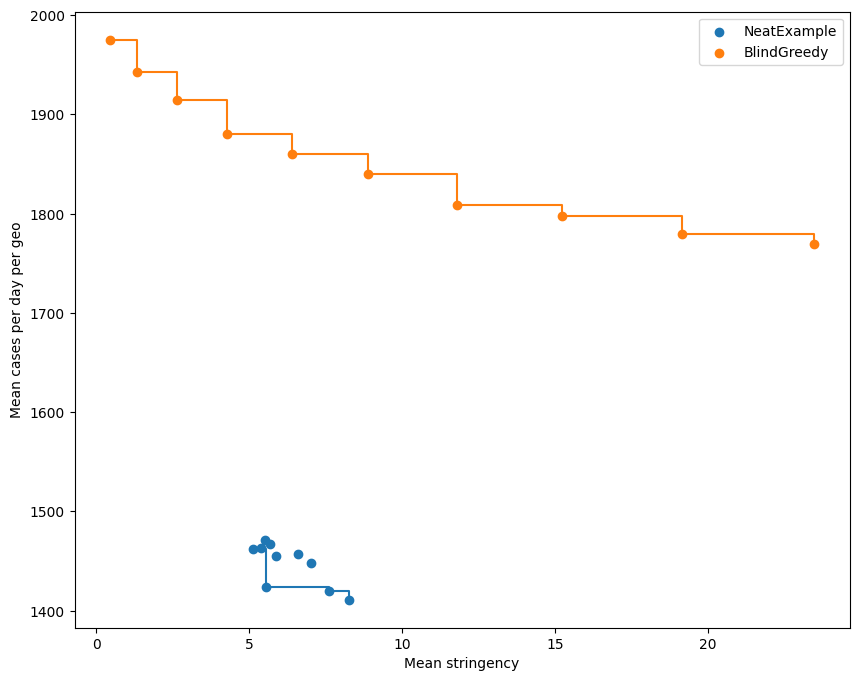

In [42]:
# Plot overall stringency and cases of each prescription
plt.figure(figsize=(10,8))
for prescriptor_name in prescription_files:
    pdf = df[df['PrescriptorName'] == prescriptor_name]
    overall_pdf = pdf.groupby('PrescriptionIndex', group_keys=False).mean().reset_index()
    plt.scatter(overall_pdf['Stringency'],
                overall_pdf['PredictedDailyNewCases'], 
                label=prescriptor_name)
    plot_pareto_curve(list(overall_pdf['Stringency']),
                      list(overall_pdf['PredictedDailyNewCases']))
plt.xlabel('Mean stringency')
plt.ylabel('Mean cases per day per geo')
plt.legend()
plt.show()

<Axes: xlabel='Date', ylabel='Stringency'>

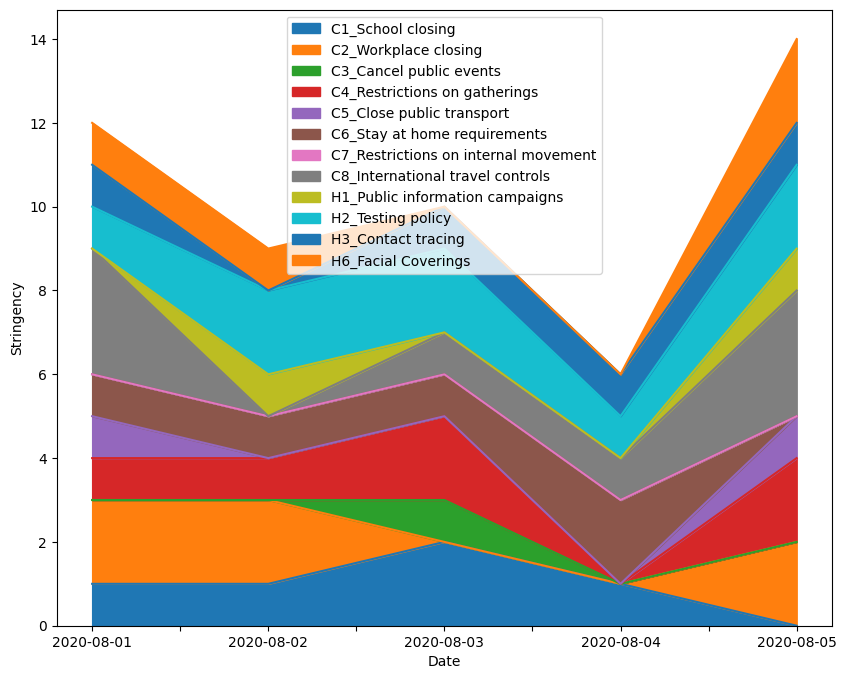

In [29]:
# Plot stacked line chart of npis over time for a prescription for a particular geo

#submission_file = 'covid_xprize.examples/prescriptors/neat/test_prescriptions/pres.csv'
submission_file = 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_1.csv'

prescription_index = 2
country_name = 'United States'
region_name = None

pdf = pd.read_csv(submission_file)
gdf = pdf[(pdf['PrescriptionIndex'] == prescription_index) &
          (pdf['CountryName'] == country_name) &
          (pdf['RegionName'].isna() if region_name is None else (pdf['RegionName'] == 'region_name'))]
gdf.plot.area(x='Date', y=NPI_COLUMNS, figsize=(10,8), ylabel='Stringency')

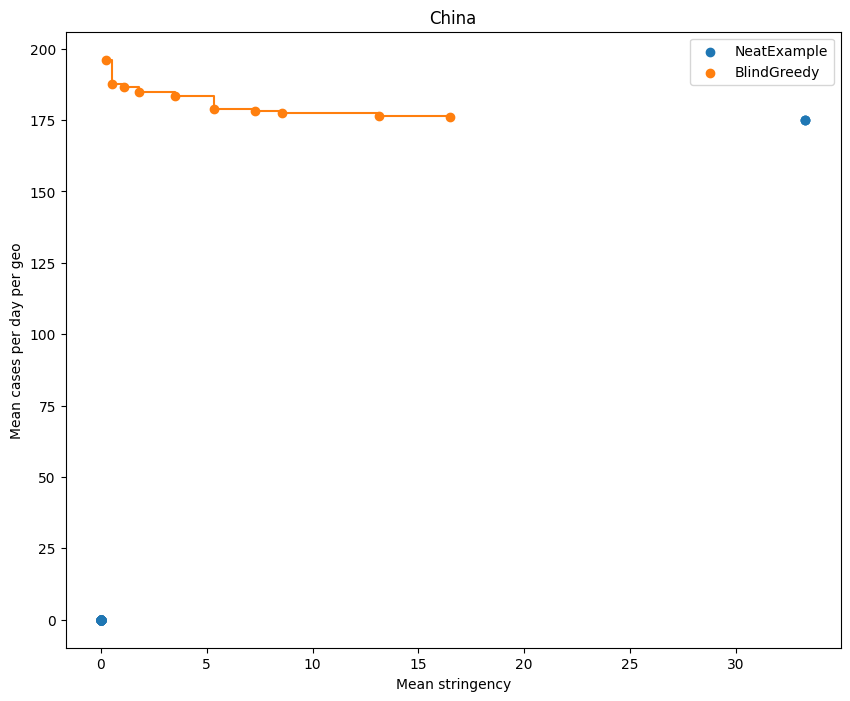

In [33]:
# Plot stringency and cases of each prescription for a particular country
country_name = 'Aruba'
cdf = df[df.CountryName == country_name]

plt.figure(figsize=(10,8))
for prescriptor_name in prescription_files:
    pdf = cdf[cdf['PrescriptorName'] == prescriptor_name]
    #overall_pdf = pdf.groupby('PrescriptionIndex', group_keys=False).mean().reset_index()
    plt.scatter(pdf['Stringency'],
                pdf['PredictedDailyNewCases'], 
                label=prescriptor_name)
    plot_pareto_curve(list(pdf['Stringency']),
                      list(pdf['PredictedDailyNewCases']))
plt.xlabel('Mean stringency')
plt.ylabel('Mean cases per day per geo')
plt.title(country_name)
plt.legend()
plt.show()